In [55]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [67]:
werewolf_df = pd.read_csv("Resources/werewolf_data.csv")
werewolf_df.head()

,lat,lng,zip,Emergency Reason,Town/City,Date,Moon Phase
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,2015-12-10,0.99
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,2015-12-10,0.99
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,2015-12-10,0.99
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,2015-12-10,0.99
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,2015-12-10,0.99


In [57]:
narrowed_phases = werewolf_df.loc[(werewolf_df["Moon Phase"]== 0.0)|(werewolf_df["Moon Phase"]== 0.25)|(werewolf_df["Moon Phase"]== 0.5)|(werewolf_df["Moon Phase"]== 0.75),:]

narrowed_phases.dtypes

lat                 float64
lng                 float64
zip                 float64
Emergency Reason     object
Town/City            object
Date                 object
Moon Phase          float64
dtype: object

In [63]:

group_moon_date = narrowed_phases.groupby(["Moon Phase", "Date"])
group_counted = group_moon_date["Emergency Reason"].count()
group_counted.head()


group_counted_df = pd.DataFrame(group_counted)
group_counted_df.reset_index(inplace=True)
group_counted_df.head(20)

,Moon Phase,Date,Emergency Reason
0,0.0,2015-12-12,402
1,0.0,2016-02-09,377
2,0.0,2016-04-08,367
3,0.0,2016-05-07,366
4,0.0,2016-07-05,383
5,0.0,2016-08-03,402
6,0.0,2016-09-02,408
7,0.0,2016-10-02,317
8,0.0,2016-10-31,448
9,0.0,2016-11-30,478


In [59]:
calls_in_day = []


Phase_Names = ["New Moon","First Quarter", "Full Moon", "Last Quarter"]
Moon_Phases = [0, 0.25, 0.5, 0.75]

for phase in Moon_Phases:
    
    calls = group_counted_df.loc[group_counted_df['Moon Phase'] == phase,'Emergency Reason']
    calls_in_day.append(calls)

    
    
    
calls_in_day    

# # plt.boxplot(group_counted_df)
# # plt.show()
# narrowed_phases.boxplot(, by="Moon Phase", figsize=(20, 10))

[0     402
 1     377
 2     367
 3     366
 4     383
 5     402
 6     408
 7     317
 8     448
 9     478
 10    369
 11    361
 12    376
 13    370
 14    492
 15    425
 16    343
 17    410
 18    430
 19    490
 20    422
 21    406
 22    318
 23    418
 24    477
 25    290
 26    470
 27    474
 28    464
 29    344
 30    429
 31    454
 32    387
 33    398
 34    354
 35    427
 36    424
 37    341
 38    350
 39    451
 40    402
 Name: Emergency Reason, dtype: int64,
 41    286
 42    387
 43    418
 44    341
 45    402
 46    448
 47    538
 48    388
 Name: Emergency Reason, dtype: int64,
 49     321
 50     286
 51     657
 52     342
 53     340
       ... 
 124    347
 125    442
 126    412
 127    437
 128    418
 Name: Emergency Reason, Length: 80, dtype: int64,
 129    375
 130    309
 131    354
 132    426
 133    450
 134    395
 135    380
 136    325
 137    420
 138    412
 139    433
 140    357
 Name: Emergency Reason, dtype: int64]

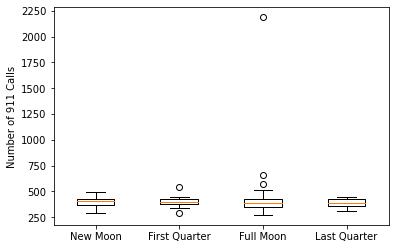

In [60]:
fig1, ax1 = plt.subplots()

ax1.set_ylabel("Number of 911 Calls")
ax1.boxplot(calls_in_day,labels=Phase_Names)
plt.show()

In [61]:
group1 = group_counted_df[group_counted_df["Moon Phase"] == 0]["Emergency Reason"]
group2 = group_counted_df[group_counted_df["Moon Phase"] == .25]["Emergency Reason"]
group3 = group_counted_df[group_counted_df["Moon Phase"] == .5]["Emergency Reason"]
group4 = group_counted_df[group_counted_df["Moon Phase"] == 0.75]["Emergency Reason"]

# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=0.15224448977873906, pvalue=0.9280957571044087)

In [71]:
bins = [0,0.2,0.4,0.6,0.8,1]
group_names = ["New Moon End", "Waxing", "Full Moon Area", "Waning", "New Moon Begin"]
werewolf_df["Phasing"] = pd.cut(werewolf_df["Moon Phase"], bins, labels=group_names, include_lowest=True)
werewolf_df

,lat,lng,zip,Emergency Reason,Town/City,Date,Moon Phase,Phasing
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,2015-12-10,0.99,New Moon Begin
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,2015-12-10,0.99,New Moon Begin
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,2015-12-10,0.99,New Moon Begin
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,2015-12-10,0.99,New Moon Begin
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,2015-12-10,0.99,New Moon Begin
...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,19403.0,Traffic: VEHICLE ACCIDENT -,EAST NORRITON,2020-07-29,NaN,NaN
663518,40.136306,-75.428697,19403.0,EMS: GENERAL WEAKNESS,LOWER PROVIDENCE,2020-07-29,NaN,NaN
663519,40.013779,-75.300835,19041.0,EMS: VEHICLE ACCIDENT,LOWER MERION,2020-07-29,NaN,NaN
663520,40.121603,-75.351437,19401.0,Fire: BUILDING FIRE,NORRISTOWN,2020-07-29,NaN,NaN


In [100]:
filtered_df = werewolf_df.loc[(werewolf_df["Phasing"]== "New Moon Begin")|(werewolf_df["Phasing"]== "Waxing")|(werewolf_df["Phasing"]== "Full Moon Area")|(werewolf_df["Phasing"]== "Waning")|(werewolf_df["Phasing"]== "New Moon End")]

group_moon_phasing = filtered_df.groupby(["Phasing", "Date"])
group_moon_phasing["Town/City"].count()
group_counted = group_moon_phasing["Emergency Reason"].count()
group_counted.head()


group_counted_df = pd.DataFrame(group_counted)
group_counted_df.reset_index(inplace=True)
group_counted_df.head()

clean_counted_df = group_counted_df.loc[group_counted_df["Emergency Reason"]!= 0,:]
clean_counted_df

,Phasing,Date,Emergency Reason
2,New Moon End,2015-12-12,402
3,New Moon End,2015-12-13,316
4,New Moon End,2015-12-14,444
5,New Moon End,2015-12-15,419
6,New Moon End,2015-12-16,376
...,...,...,...
7380,New Moon Begin,2019-12-21,405
7381,New Moon Begin,2019-12-22,360
7382,New Moon Begin,2019-12-23,463
7383,New Moon Begin,2019-12-24,377


In [101]:
calls_in_day = []


Phase_Names = ["New Moon End","Waxing", "Full Moon Area", "Waning", "New Moon Begin"]
Moon_Phases = ["New Moon End","Waxing", "Full Moon Area", "Waning", "New Moon Begin"]

for phase in Moon_Phases:
    
    calls = clean_counted_df.loc[group_counted_df['Phasing'] == phase,'Emergency Reason']
    calls_in_day.append(calls)


In [102]:
calls_in_day

[2       402
 3       316
 4       444
 5       419
 6       376
        ... 
 1450    395
 1451    363
 1452    326
 1453    383
 1454    404
 Name: Emergency Reason, Length: 318, dtype: int64,
 1485    346
 1486    272
 1487    271
 1488    427
 1515    286
        ... 
 2905    432
 2932    455
 2933    433
 2934    421
 2935    378
 Name: Emergency Reason, Length: 203, dtype: int64,
 2966    448
 2967    519
 2968    447
 2969    321
 2970    286
        ... 
 4417    418
 4418    473
 4419    421
 4420    313
 4421    440
 Name: Emergency Reason, Length: 432, dtype: int64,
 4451    352
 4452    314
 4453    262
 4454    334
 4455    322
        ... 
 5872    394
 5899    472
 5900    467
 5901    435
 5902    515
 Name: Emergency Reason, Length: 204, dtype: int64,
 5908    114
 5909    391
 5933    401
 5934    445
 5935    430
        ... 
 7380    405
 7381    360
 7382    463
 7383    377
 7384    321
 Name: Emergency Reason, Length: 320, dtype: int64]

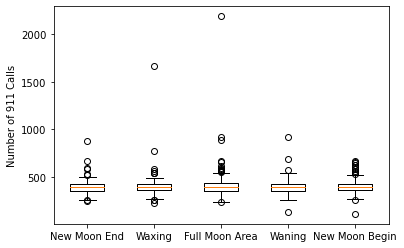

In [103]:
fig1, ax1 = plt.subplots()

ax1.set_ylabel("Number of 911 Calls")
ax1.boxplot(calls_in_day,labels=Phase_Names)
plt.show()

In [106]:
group1 = group_counted_df[group_counted_df["Phasing"] == "New Moon Begin"]["Emergency Reason"]
group2 = group_counted_df[group_counted_df["Phasing"] == "Waxing"]["Emergency Reason"]
group3 = group_counted_df[group_counted_df["Phasing"] == "New Moon Area"]["Emergency Reason"]
group4 = group_counted_df[group_counted_df["Phasing"] == "Waning"]["Emergency Reason"]
# group5 = group_counted_df[group_counted_df["Phasing"] == "New Moon End"]["Emergency Reason"]

# Perform the ANOVA
stats.f_oneway(group1, group2, group3)


/Users/Alexander/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [ ]:
# BINNING ISSUE MAYBE 0.8 --> 1 